##Linear Regression Exercise

In this exercise, we will be predicting the median housing price in an area given certain attributes that describe area. We will be working with california housing prices dataset. Each sample in the dataset corresponds to an area in california. The attributes are latitude, longitude, median age of houses in the area (in years), total number of rooms in the area, total number of bed rooms in the area, population of the area, number of households in the areas, median income in the area (in tens of thousands of dollars), the area's proximity to ocean and the median house value.

###Get Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#HOUSING_PATH = "/content/drive/MyDrive/myLMSCourses/ML/2021_22_evenSemBatch/Practicals/1_exercise1/"
HOUSING_PATH = "/content/drive/My Drive/Colab Notebooks/ml_class/housing.csv" #upload the housing.tgz file into the drive and give the path here


In [ ]:
import os
import tarfile
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  tgz_path = os.path.join(housing_path, "housing.tgz")
  housing_tgz = tarfile.open("/content/drive/My Drive/Colab Notebooks/ml_class/housing.tgz")
  housing_tgz.extractall(path="housing.tgz")
  housing_tgz.close()
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv("/content/drive/My Drive/Colab Notebooks/ml_class/housing.csv")

housing = load_housing_data()

###Peek into Data

In [ ]:
# look at the top five rows of data using dataframe's head method
# Your code below
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/ml_class/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# Get a quick description of data using dataframe's info method; make a note of attributes with missing values in this notebook below this cell using a markdown cell.
# Your code below
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


missing attribute: total_bedrooms 207

In [ ]:
# What kind of attribute is ocean_proximity? Discrete or continuous? If discrete, use value_counts method on the column corresponding
# to ocean_proximity and get a description?
# Your code below
df["ocean_proximity"].value_counts()



ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
# Use describe method on the dataframe to get a summary of the numerical attributes
print(df.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

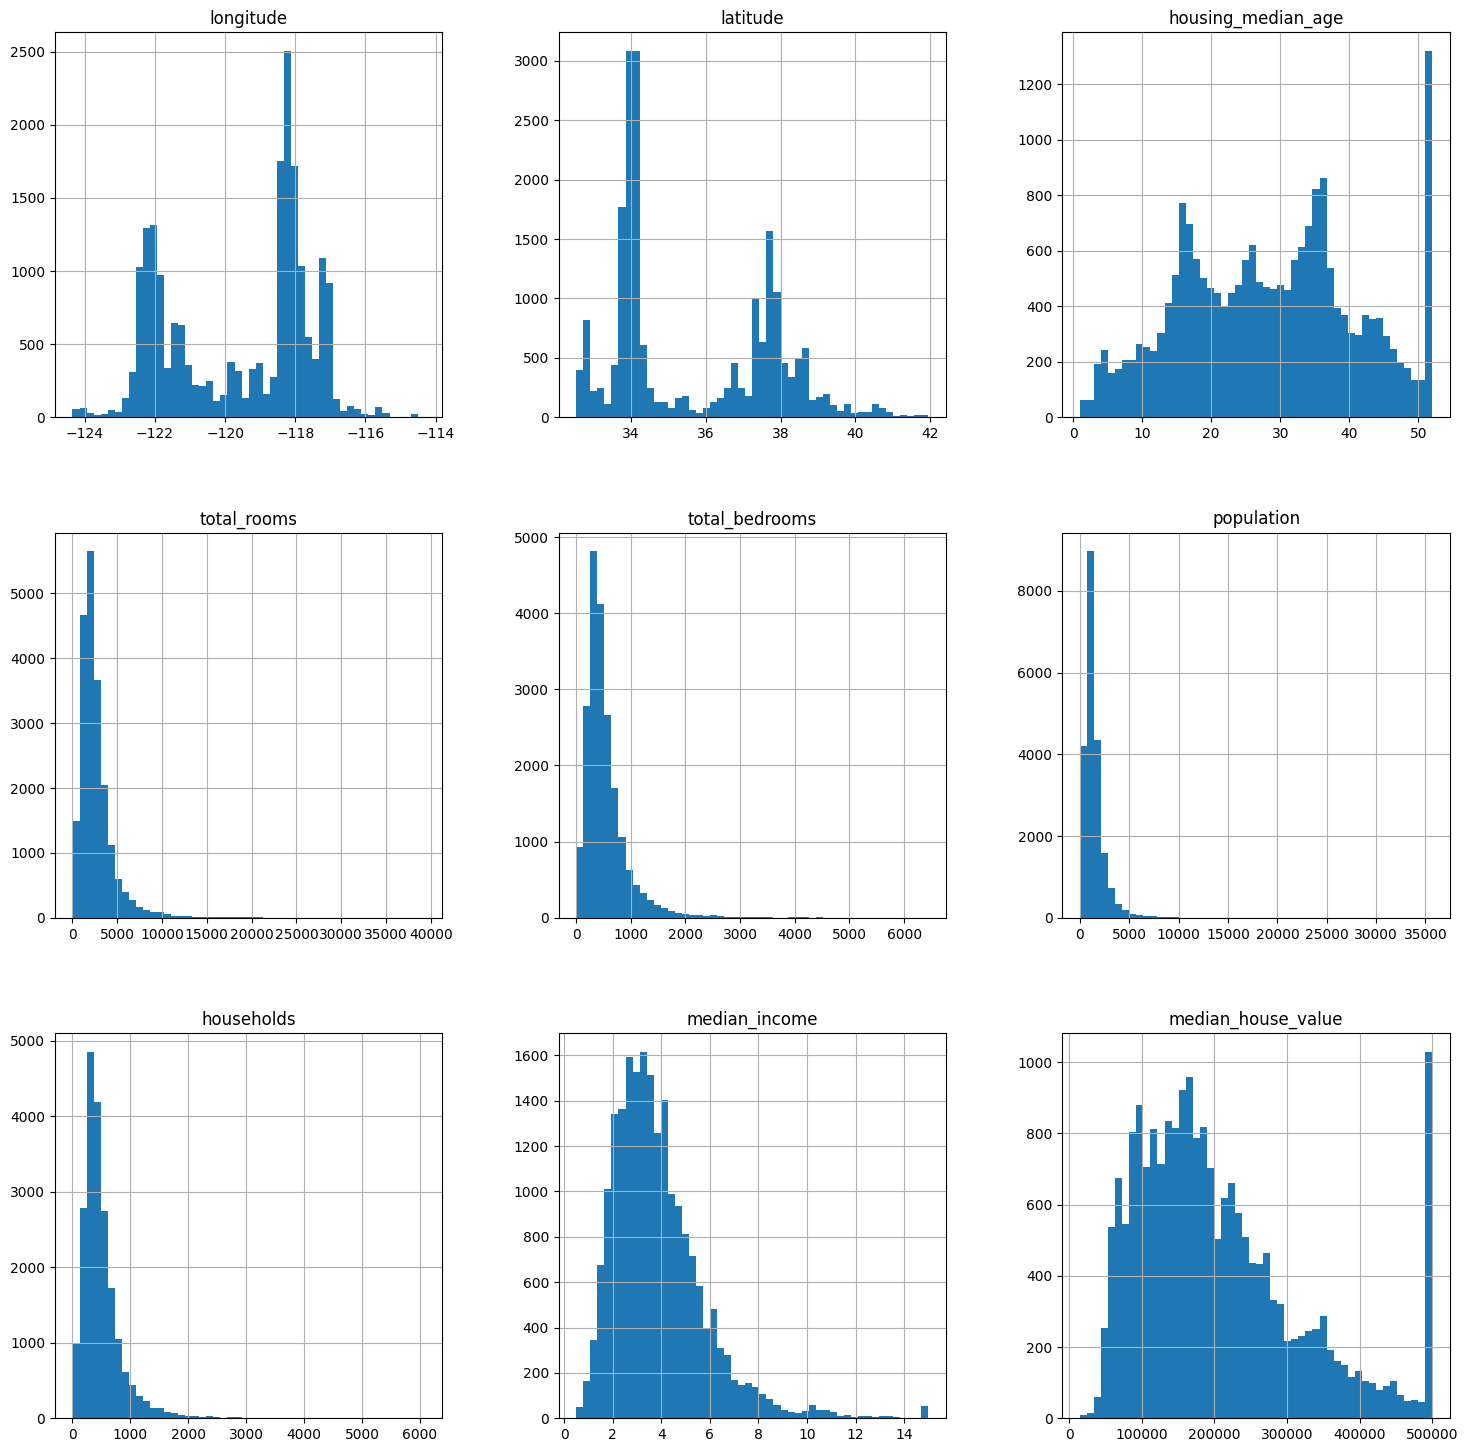

In [ ]:
# Numerical attributes can also be described using histograms
# Observe how many attributes are thick tailed? What about the scales of the attributes? Are they uniform or vastly different?
%matplotlib inline
import matplotlib.pyplot as plt
#use hist method on dataframe
# Your code below
df.hist(bins=50, figsize=(18,18))
plt.show()


###Create Test Data
Why create test set now, right at the beginning? The reason is to avoid data snooping bias. That is, the more we look into data, our brain is powerful to capture the pattern seen in that data and will naturally influence our choice of the model. But that model may not generalize well during deployment since it was chosen simply based on some pattern seen in some sample data. So, it is better to separate out test set right in the beginning and keep it only for testing. We can do a pure random split of data into train and test set. For this you can look at train_test_split class in sklearn.model_selection. But, suppose your manager told that median income is an important attribute for predicting house price. Then, you would want to split data so that it reflects the various categories of median income in both train and test data. This is called as stratified sampling. Of course, median income is right now a numeric attribute. You have to create a new categorical attribute called income_cat, use that to split data into train and test sets, and then remove the income_cat attribute. To create income_cat, we can look at its respective histogram above and find that most median incomes are clustered around 1.5-6 (i.e \$15000-\$60000). So our categories could be 0-1.5, 1.5-3, 3-4.5, 4.5-6, >6.

In [ ]:
import numpy as np
# create income_cat attribute as described above
#housing["income_cat"] = # fill the code here; use cut method in pandas
housing["income_cat"] = pd.cut(df["median_income"],
                          bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                          labels=[1, 2, 3, 4, 5])
print(housing)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [ ]:
# create train test stratified split (80-20 split) using income_cat attribute; use the train_test_split() method in sklearn.model_selection module
from sklearn.model_selection import train_test_split

# Your code below
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing["income_cat"])
train_set["income_cat"] = housing.loc[train_set.index, "income_cat"]
test_set["income_cat"] = housing.loc[test_set.index, "income_cat"]
print(train_set)
print(test_set)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income  media

In [ ]:
# to check if the stratified split worked, compute and display the proportions of income categories in the test set and the whole dataset, and compare
# and make your observations in a markdown cell below.
test_set_proportions = test_set["median_income"].value_counts() / len(test_set)
print("Proportions of income categories in test set:")
print(test_set_proportions)
print()
original_proportions = df["median_income"].value_counts() / len(df)
print("Proportions of income categories in original dataset:")
print(original_proportions)

Proportions of income categories in test set:
median_income
4.1250     0.002907
3.1250     0.002907
15.0001    0.002665
3.8750     0.002422
2.1250     0.002422
             ...   
3.7831     0.000242
2.8056     0.000242
2.1270     0.000242
2.1518     0.000242
4.1111     0.000242
Name: count, Length: 3446, dtype: float64

Proportions of income categories in original dataset:
median_income
3.1250     0.002374
15.0001    0.002374
2.8750     0.002229
2.6250     0.002132
4.1250     0.002132
             ...   
4.0774     0.000048
4.1767     0.000048
6.1814     0.000048
6.4319     0.000048
2.0943     0.000048
Name: count, Length: 12928, dtype: float64


we can determine if the stratified sampling was effective.Ideally, the proportions in the test set should closely resemble those in the original dataset. Any significant deviations could indicate issues with the stratified sampling process.

In [ ]:
# drop the income_cat attribute from both train and test set; use dataframes's drop method
# Your code below
train_set.drop("income_cat", axis='columns', inplace=True)
test_set.drop("income_cat", axis='columns', inplace=True)

# Explore Data  
We will explore train data more to gain more insights. We will not touch test data. It will only be used at the end when we build a model and we are ready to test it. Even for exploring train set, to be on the safer side, we will make a copy of it. We will first visualize train data using scatter plot. See the plot below carefully. A lot of information has been embedded into it. Answer the questions given in comments.


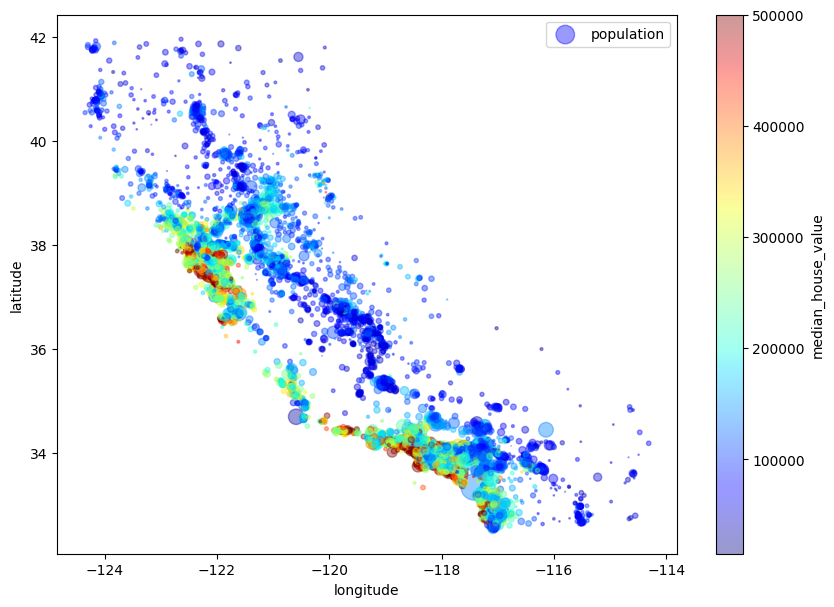

In [ ]:
housing = train_set.copy()
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100,
         label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"),
         colorbar=True)
plt.legend()

# What does the size of the scatter point indicate? What does the color of the scatter point indicate? What is the relationship
# between ocean_proximity and median_house_value (note that the ocean is towards the bottom left in the plot)? Is there relationship between population and median_house_value?
# Describe the role of alpha parameter in the dataframe's plot method.

The size of the scatter points indicates the population of each area. Larger points represent areas with higher populations.

The color of the scatter points indicates the median house value. The colorbar shows the range of house values, with different colors representing different value ranges.

Areas closer to the ocean (bottom left in the plot) tend to have higher median house values, indicated by the color gradient.

There is no clear relationship between population size (point size) and median house value (point color).

Role of Alpha Parameter: The alpha parameter in the plot method controls the transparency of the scatter points. Lower alpha values make the points more transparent, which helps in visualizing overlapping points and identifying density patterns.

We will now look at linear correlations between median_house_value and all other attributes. Complete the code below and answer the questions given in comments. In case you are not familiar with the concept of Perason's correlation, read about it.

In [ ]:
# use dataframe's corr method to get correlation matrix of every pair of attributes
corr_matrix = housing.select_dtypes(include=['number']).corr()

# extract only median_house_value column from corr_matrix and sort it in descending order
# for sorting, use pandas series method sort_values
# Your code below
corr_median_house_value=corr_matrix["median_house_value"].sort_values(ascending=False)
print(corr_median_house_value)
# Which attribute correlates positively highly with median_house_value? Are there attributes which have negligible linear correlations
# with median_house_value? What about negative linear correlations? Does a correlation value of zero or close to zero mean absolutely no relationship?

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64


'median_income' (0.688075) shows the strongest positive correlation with 'median_house_value'.

Attributes like 'total_bedrooms', 'households', and 'population' have correlation values close to zero, indicating negligible linear correlations.

Attributes like 'latitude' and 'longitude' have negative correlations, indicating an inverse relationship with 'median_house_value'.

A correlation value of zero or close to zero indicates that there is no linear relationship between the two variables. However, this does not mean that there is absolutely no relationship between them. There could be a non-linear relationship that Pearson's correlation coefficient does not capture.

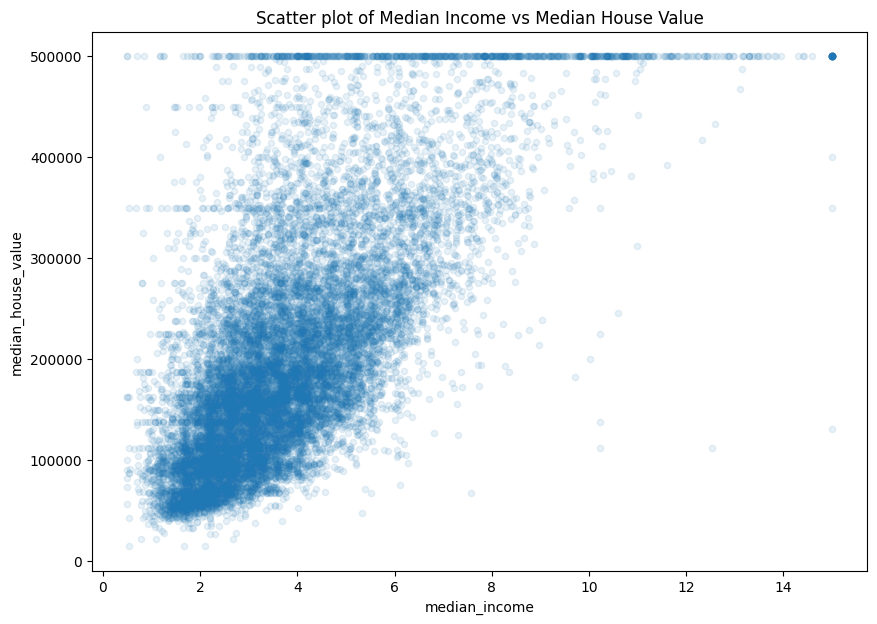

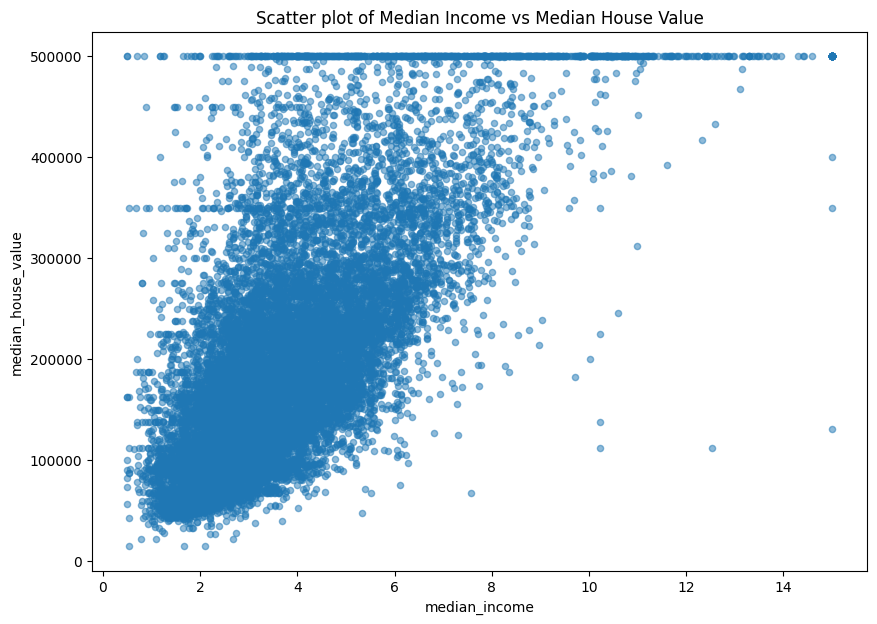

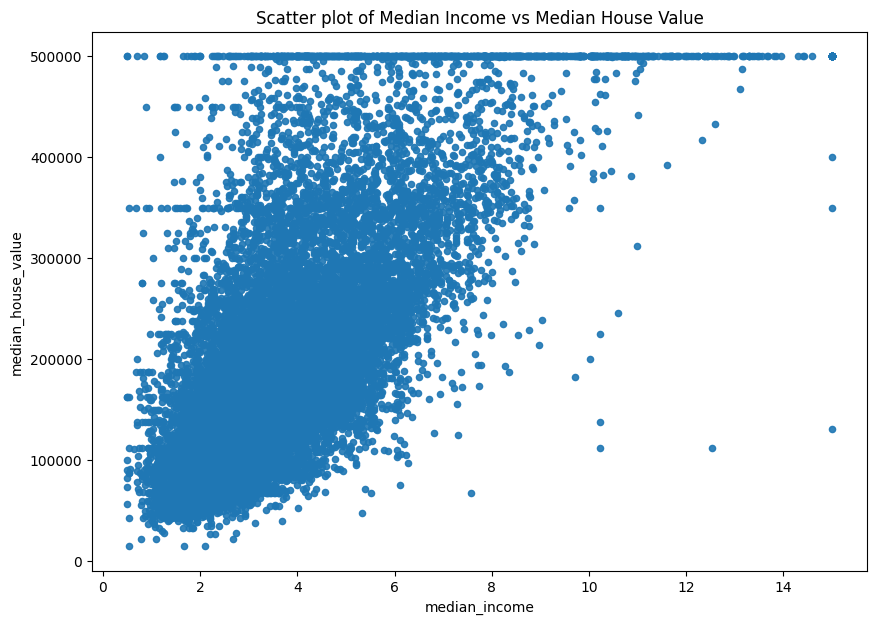

In [ ]:
# Since median_income highly correlates with median_house_value, let's focus on that.
 # Display a scatter plot of median_income vs median_house_value
 # Your code below
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.1, figsize=(10, 7),
title="Scatter plot of Median Income vs Median House Value")
plt.show()
# Does the plot reveal anything? Change alpha value and see.
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.5, figsize=(10, 7),
title="Scatter plot of Median Income vs Median House Value")
plt.show()
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.9, figsize=(10, 7),
title="Scatter plot of Median Income vs Median House Value")
plt.show()

We notice that the median_house_value has a horizontal line at 500,000. This is because the median_house_value has been capped at 500,000 in the dataset.


In [ ]:
# Attribute like total_rooms, total_bedrooms, population are too general to relate to house price
# Above correlations also show this
# Why not create population per household, rooms per household, ratio of bed_rooms to rooms?
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241


In [ ]:

# Now see the correlations of median_house_value to all the attributes including new attributes introduced above
# Your code below
correlations = housing.corr(numeric_only=True)['median_house_value'].sort_values()

print(correlations)


# Any new observations ??

bedrooms_per_room          -0.259952
latitude                   -0.142673
longitude                  -0.047466
population                 -0.026882
population_per_household   -0.021991
total_bedrooms              0.047781
households                  0.064590
housing_median_age          0.114146
total_rooms                 0.135140
rooms_per_household         0.146255
median_income               0.687151
median_house_value          1.000000
Name: median_house_value, dtype: float64


'rooms_per_household' (0.146255) show moderate positive correlations with 'median_house_value'.

'bedrooms_per_room' (-0.259952) has a moderate negative correlation with 'median_house_value'.

'population_per_household' (-0.021991) show very weak correlations with 'median_house_value'.


# Prepare (Preprocess) Data

We have explored train data and found that some derived attributes may be useful. Now, we will need to preprocess and prepare the data before building the model to process the prepared data. For the data under consideration we need to do the following:

1.Separate the label (median_house_value) and the rest of the attributes

2.Fill the missing values in total_bedrooms attribute with median of rest of of the entries in it.

3.As we noted earlier, scales of attributes are vastly different. Bring all of them to uniform scale using standardization. That is, for each attribute (not the label), subtract mean of it from each of its entry and divide by its standard deviation. This way, all attributes will become zero centred and will have its scale in standard deviation units. There is another way called as normalization to bring all attributes into uniform scale. Here, for each attribute, subtract min of that attribute from each of its entry and divide by max minus min of that attribute. This will ensure the range of attribute is in [0, 1]. Standardization is preferred over normalization generally since normalization are more sensitive to outliers than standardization. For eg, guess what will happen if one attribute had all the values in the range 0-15 except for one (which is 100). In normalization, the range will simply get crushed to [0, 0.15] whereas in standardization it is more likely to be wider.

4.Note that ocean_proximity is a categorical attribute. We need to convert it to numerical attribute before building the model. One way of doing this is to simply assign 0, 1, 2... to the categories. This might work in certain situations but not always. For eg, in the situation here, assigning 0 to <1H OCEAN, 1 to INLAND, 2 to NEAR OCEAN, 3 to NEAR BAY and 4 to ISLAND would mean to the model that NEAR OCEAN and INLAND are closer than NEAR OCEAN and <1H OCEAN, which is wrong. Instead, since there are 5 categories, we will represent each category by a binary vector of length 5 such that one unique component of this binary vector is 1 and rest are zero for this category, and so on. In other words, <1H OCEAN will be represented by 10000, INLAND will be represented by 01000, and so on. This is called as one hot encoding. We will be converting ocean_proximity into one hot encoding representation. One hot encoding will not be efficient if the number of catgories are very large. For eg, imagine that the categorical attribute is vocabulary and the number of categories are number of words in the vocabulary. But in the case here, we have only 5 categories. So, no problem with one hot encoding.

How do we go about transforming the data as mentioned above?
We will take advantage of sklearn.

For filling missing values, we will use sklearn's SimpleImputer class from the Impute package. It deals only with numerical attributes.
For standardizing the scales of numerical attributes, we will use sklearn's StandardScaler class from the preprocessing package.
Since both of the above transforms deal with numerical attributes and they have to be in order (i.e first fill missing values, then standardize), we can set up a sklearn pipeline (we will call it numerical_pipeline) using Pipeline class from the pipeline package that will perform the above transforms in order.
For representing ocean_proximity in one hot encoding, we will use OneHotEncoder class from preprocessing package.
Numerical pipeline discussed above requires only numerical attributes. One hot encoding requires only categorical attributes. This means we need to extract numerical attributes separately, categorical attributes separately, perform the respective transforms and then combine again. This is cumbersome. What we need is to set up a single pipeline that will automatically do numerical pipeline on the numerical attributes, categorical pipeleine on the categorical attributes and finally output the preprocessed data. sklearn provides a ColumnTransformer class in compose package that can do this.

In [ ]:
# First separate the label median_house_value
# Fill your code here; make a copy of the median_house_value
housing_labels = housing['median_house_value'].copy()
print(housing_labels)
# drop the median_house_value from housing dataframe inplace
# Your code below
housing.drop('median_house_value', axis=1, inplace=True)
print(housing)


12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
           ...   
15174    268500.0
12661     90400.0
19263    140400.0
19140    258100.0
19773     62700.0
Name: median_house_value, Length: 16512, dtype: float64
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44         

In [ ]:
# Fill any missing value with median value of the attribute it corresponds to
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')# Fill your code here; instantiate SimpleImputer object with median strategy
imputer.fit(housing.select_dtypes(include=['number']))


# Note that the imputer will be automatically used on numerical attributes once we set up the pipeline.
# Right now, we have instantiated it.

SimpleImputer(strategy='median')

In [ ]:
# Transform the numerical columns
housing_filled = imputer.transform(housing.select_dtypes(include=['number']))

# Convert back to DataFrame
housing_filled = pd.DataFrame(housing_filled, columns=housing.select_dtypes(include=['number']).columns)

# Check for any missing values
print(housing_filled.isnull().sum())

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
rooms_per_household         0
bedrooms_per_room           0
population_per_household    0
dtype: int64


In [ ]:
# Standardization
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()# Fill your code here; instantiate StandardScaler object


In [ ]:
# Fit the scaler to the numerical columns
std_scaler.fit(housing_filled)

# Transform the numerical columns
housing_standardized = std_scaler.transform(housing_filled)

# Convert back to DataFrame
housing_standardized = pd.DataFrame(housing_standardized, columns=housing_filled.columns)

# Check the result
print(housing_standardized.head())

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -0.941350  1.347438            0.027564     0.584777        0.640371   
1   1.171782 -1.192440           -1.722018     1.261467        0.781561   
2   0.267581 -0.125972            1.220460    -0.469773       -0.545138   
3   1.221738 -1.351474           -0.370069    -0.348652       -0.036367   
4   0.437431 -0.635818           -0.131489     0.427179        0.272790   

   population  households  median_income  rooms_per_household  \
0    0.732602    0.556286      -0.893647             0.017395   
1    0.533612    0.721318       1.292168             0.569256   
2   -0.674675   -0.524407      -0.525434            -0.018024   
3   -0.467617   -0.037297      -0.865929            -0.595140   
4    0.374060    0.220898       0.325752             0.251241   

   bedrooms_per_room  population_per_household  
0          -0.122484                  0.006223  
1          -0.911663                 -0.040811  
2          

In [ ]:
# set up the pipeline consisting of above two transforms which deal with numerical attributes
from sklearn.pipeline import Pipeline

numerical_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),('std_scaler', StandardScaler())])
print(numerical_pipeline)
#Fill your code here; instantiate Pipeline object with the above two transforms in order


# The way this pipeline works is as follows. When we call its fit_transform method on the data devoid of categorical attributes,
# it will first call the fit_transform method of the imputer object. The fit_transform method of the imputer object will first call
# fit method of the imputer object which will compute the median of all numerical attributes, respectively (based on their non-null values)
# and store it in statistics_ public variable and return itself. Then the transform method from SimpleImputer class is called on the returned
# imputer object which will fill the missing values with the respective median value picked up from statistics_ variable.
# The transform method returns the transformed data. This will then go as input to the fit method of the std_scaler transform in the
# pipeline. The fit method will compute mean and std dev with respect to each attribute and store them in mean_ and scale_ public variables,
# and return the std_scaler object itself. Then the transform method from the StandardScaler class is called on the returned std_scaler
# object which will do the standardization on each numerical attribute, respectively. The transformed data will be returned by the pipeline.

# Currently we are not calling the fit_tranform method on the pipeline because that will require data to be devoid of categorical
# attributes. As already explained earlier, we will not do that. Instead we will set up another pipeline which will handle
# this pipeline and the transforms on categorical attributes automatically.

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('std_scaler', StandardScaler())])


In [ ]:
# represent ocen_proximity attribute in one hot vector encoding
from sklearn.preprocessing import OneHotEncoder

categorical_encoder = OneHotEncoder() # Fill your code here; instantiate OneHotEncoder object
categorical_encoder.fit(housing[["ocean_proximity"]])

OneHotEncoder()

In [ ]:
# set up the ColumnTransformer pipeline that will automatically deal with both numerical pipeline and OneHotEncoder transform.
from sklearn.compose import ColumnTransformer

all_attribs = list(housing.columns)
numerical_attribs = all_attribs.copy()# Fill your code here; get the list of numerical attribute names - first get all attribute names; then remove
numerical_attribs.remove('ocean_proximity')# ocean proximity; Note that remove method of list does inplace removal and returns none if success; if you are
                     # using remove method, don't chain it with list creation; do it in the next line separately.
categorical_attribs = ['ocean_proximity']# Fill your code here; create a list with one entry which is ocean_proximity
full_pipeline = ColumnTransformer([('num', numerical_pipeline, numerical_attribs), ('cat', OneHotEncoder(), categorical_attribs)])# Fill your code here; instantiate ColumnTransformer pipleline with numerical pipeline followed by one hot encoder
housing_prepared = full_pipeline.fit_transform(housing)# Fill your code here; call the fit_transform method on the ColumnTransformer pipeline object
print(housing_prepared[:5])
# The pipeline works similar to what was already explained earlier.


[[-0.94135046  1.34743822  0.02756357  0.58477745  0.64037127  0.73260236
   0.55628602 -0.8936472   0.01739526 -0.12248362  0.00622264  0.
   1.          0.          0.          0.        ]
 [ 1.17178212 -1.19243966 -1.72201763  1.26146668  0.78156132  0.53361152
   0.72131799  1.292168    0.56925554 -0.91166333 -0.04081077  0.
   0.          0.          0.          1.        ]
 [ 0.26758118 -0.1259716   1.22045984 -0.46977281 -0.54513828 -0.67467519
  -0.52440722 -0.52543365 -0.01802432 -0.3709391  -0.07537122  0.
   1.          0.          0.          0.        ]
 [ 1.22173797 -1.35147437 -0.37006852 -0.34865152 -0.03636724 -0.46761716
  -0.03729672 -0.86592882 -0.59513997  1.11587294 -0.10680295  0.
   0.          0.          0.          1.        ]
 [ 0.43743108 -0.63581817 -0.13148926  0.42717947  0.27279028  0.37406031
   0.22089846  0.32575178  0.2512412  -0.52682062  0.00610923  1.
   0.          0.          0.          0.        ]]


### Select and Train Model
Now that the data is prepared, we need to select a model, train it and see how it performs. Sometimes application and data can guide towards model selection. For example, if the volume of data is very large and the application is computer vision or natural language processing, neural networks are very powerful models. As one gains more experience, it becomes relatively easy to identify the family of models that would suit a particular problem at hand. However, one may not be able to nail down to the best model right at the first instance, even with experience. It is always an iterative process. Multiple models have to compared before finalizing on the model to be deployed. For now, we will only train a linear regression model in this notes.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # import the function
from sklearn.metrics import r2_score # import the function
lin_reg = LinearRegression()# Fill your code here; instantiate LinearRegression object
lin_reg.fit(housing_prepared, housing_labels)
# Now fit the data using fit the method on linear regression object
# Your code below
housing_predictions=lin_reg.predict(housing_prepared)
mse=mean_squared_error(housing_labels,housing_predictions)
print(mse)
r2=r2_score(housing_labels,housing_predictions)
print(r2)
print("Coefficients:", lin_reg.coef_)
print("Intercept:", lin_reg.intercept_)

4645911608.916934
0.6529270327402139
Coefficients: [-56046.33896677 -56657.82876645  13931.56938783   7996.0630126
    322.80384089 -46114.16368891  42894.50706978  78265.15994713
   7278.00685102  16859.18615554    913.38798131 -17551.72508026
 -51777.57825901 105745.06664576 -22255.10163102 -14160.66167547]
Intercept: 235539.0219952679


In [ ]:
# let's try out this model on few instances from train data

sample_data =housing.head(5) # Fill your code here; get first five rows from housing dataframe
sample_labels = housing_labels.head(5)  # Fill your code here; get first five labels from housing_labels pandas series
sample_data_prepared = full_pipeline.transform(sample_data)# Fill your code here; transform the sample_data using full_pipeline.
                        # Note that you need to only transform this data; not fit. Fitting was already done.
predictions = lin_reg.predict(sample_data_prepared)# Fill your code here; get the predictions on sample_data using predict method on the already fitted linear regression object


print("Predictions: ", predictions)
print("Groundtruth: ", list(sample_labels))


Predictions:  [ 83648.54287152 305815.0882093  150013.37994426 188096.42566946
 241840.13952577]
Groundtruth:  [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


We can see that the predictions are not very close. Infact they are off by around 27% on average. We can check the performance on the entire training set. Before doing that, we need a way of quantifying the performance. There are three standard performance measure for linear regression viz. mean absolute error (MAE), mean squared error (MSE) and root mean squared error (RMSE).

MAE = $\frac{1}{n}\sum_{i=1}^{n} |(y^i-\hat y^i)|$

MSE = $\frac{1}{n}\sum_{i=1}^{n} (y^i-\hat y^i)^2$

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y^i-\hat y^i)^2}$

The linear regression model can be fit by minimizing any of the above errors. Note that MSE punishes large errors more severely than MAE. So, MSE is sensitive to outliers than MAE. Further, minimizing MSE results in units of the response getting squared and so intrepretation becomes difficult. Hence, RMSE is preferred over MSE which maintains MSE. We will use RMSE below to see the performance, but we can try with any of the above.

In [ ]:
from sklearn.metrics import mean_squared_error

predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, predictions)
lin_rmse = np.sqrt(lin_mse)
print(f"RMSE: {lin_rmse:.2f}")

RMSE: 68160.92


What this means is that the predictions are off by \$68,161 on the training set. Is this a good performance on the train set? Compare this offset with the range of median_house_value between  $25^{th}$ and $75^{th}$ percentile we had obtained earlier using dataframe's describe method. In fact the model is underfitting the data. We need to look for more complex models, like decision tree or random forest.

### Fine-tune Model
We saw that the model was underfitting. In some cases, the model may overfit (i.e give 0 train error). We know that we should look for better models. But, since we have now studied only regression, we need to wait until we pick other models. In any case, in the end-end ML solution, once we fit the model, we try to finetune its hyperparameters using a validation dataset. That is, we try different values of hyperparameters for the model, check its performance on the validation set and choose the one which gives the best performance. The validation dataset should neither intersect with train nor the test set. If it intersects with trainset, the model is likely to overfit depending on the amount of intersection. And we know that the test set is not to be touched at all during training. In linear regression, the only hyper parameter we can think of tuning is whether to have the intercept parmeter or not. However, in the example we are studying here, the performance is not going to change (check for yourself). So, we will not not be doing any hyperparameter finetuning here. But remember that this step is important in the end-end ML solution. We will understand more about hyperparameters as we go along.

Of course, we can also a lot of analysis like what we had one in our earlier linear regression notes to finetune the model. I leave that as optional exercise.

### Evaluation on Test Set
Assume that the linear regression model is the best model we have got after all the above steps. Now, we will test the model on the test set.

In [ ]:
X_test = test_set.drop('median_house_value', axis=1)# Fill your code here; drop median_house_value from strat_test_set
test_labels = test_set['median_house_value'].copy()# Fill your code here; get a copy of median_house_value column from strat_test_set

# add the derived attributes rooms_per_household, bedrooms_per_room, population_per_household
# Your code below
X_test['rooms_per_household'] = X_test['total_rooms'] / X_test['households']
X_test['bedrooms_per_room'] = X_test['total_bedrooms'] / X_test['total_rooms']
X_test['population_per_household'] = X_test['population'] / X_test['households']


X_test_prepared = full_pipeline.transform(X_test) # Fill your code here; transform X_test through full pipeline
test_predictions = lin_reg.predict(X_test_prepared)# Fill your code here; get test predictions
test_mse = mean_squared_error(test_labels, test_predictions)# Fill your code here; compute test mse
test_rmse = np.sqrt(test_mse)# Fill your code here; compute test rmse

print(f"RMSE: {test_rmse:.2f}")

RMSE: 66803.14


### Pre-launch
Before you launch the model, you need to present it to your team to get their final approval. So, as a pre-launch exercise, you will submit the completed assignment to me.

###Launch
You can launch your model as webservice through a REST API or through some other means. We will not dicuss that now.

The model fitted is influenced more by "Median_income".This was seen before by finding the correlation matrix, in which 'Median_income' had highest correlation value.

In [ ]:
lin_reg.coef_

array([-56046.33896677, -56657.82876645,  13931.56938783,   7996.0630126 ,
          322.80384089, -46114.16368891,  42894.50706978,  78265.15994713,
         7278.00685102,  16859.18615554,    913.38798131, -17551.72508026,
       -51777.57825901, 105745.06664576, -22255.10163102, -14160.66167547])

'ocean_proximity' attribute influences the model most.

In [ ]:
print(lin_reg.intercept_)

235539.0219952679


In the absence of all the attributes,(Only w0 remains, ie intercept)so the model gives intercept value.